In [186]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from nested_dict import nested_dict
import ipywidgets as widgets
from collections import defaultdict

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [187]:
artifacts_dir = "/etc/skel/sandmark-nightly/sequential/"

In [188]:
bench_files = []

artifacts_path = artifacts_dir.split("/sequential/")[0]
print(artifacts_path)

for root, dirs, files in os.walk(artifacts_dir):
#     print(dirs)
    for file in files:
#         print(file)
        if file.endswith("_1.orun.summary.bench"):
            # print(root)
            f = root.split("/sequential/")
#             print(f)
            bench_files.append((os.path.join(root, file)))

print(bench_files)

/home/sk/sandmark-nightly
['/home/sk/sandmark-nightly/sequential/20210608_084403/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark-nightly/sequential/20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orun.summary.bench', '/home/sk/sandmark-nightly/sequential/20210608_101103/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench', '/home/sk/sandmark-nightly/sequential/20210608_101103/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects+rename_1.orun.summary.bench']


In [189]:
# len(bench_files)
for b in bench_files :
    print(b + '\n')

/home/sk/sandmark-nightly/sequential/20210608_084403/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench

/home/sk/sandmark-nightly/sequential/20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orun.summary.bench

/home/sk/sandmark-nightly/sequential/20210608_101103/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench

/home/sk/sandmark-nightly/sequential/20210608_101103/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects+rename_1.orun.summary.bench



In [190]:
benches = defaultdict(list)
for x in bench_files:
#     print(x)
    l = x.split("/sequential/")[1]
    print(l)
    d = l.split("/")
#     print(d)
    timestamp    = d[0]
    commit       = d[1]
    variant      = d[2]
    variant      = d[2].split('_')[0]
    variant_stem = d[2].split('_')[1]
    value        = variant + '+' + commit + '_' + variant_stem
    benches[timestamp].append(value)
benches = dict(benches)

20210608_084403/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench
20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orun.summary.bench
20210608_101103/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench
20210608_101103/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects+rename_1.orun.summary.bench


In [191]:
benches

{'20210608_084403': ['4.12.0+stock+7e6b22b232146f9177cbfa874b3fcc66ceed192b_1.orun.summary.bench',
  '4.12.0+domains+effects+06d5aa0bf63778de509a7eee129bb5f31508466f_1.orun.summary.bench'],
 '20210608_101103': ['4.12.0+stock+7e6b22b232146f9177cbfa874b3fcc66ceed192b_1.orun.summary.bench',
  '4.12.0+domains+effects+rename+06d5aa0bf63778de509a7eee129bb5f31508466f_1.orun.summary.bench']}

In [202]:
def f(x): return x

def disp(benches):
    
    def select_commit(timestamp):
        variantW.options = benches[timestamp]
    
    def do_nothing(variant):
        pass
    
    timestampW = widgets.Dropdown(options=benches.keys(), description='Timestamp', disabled=False)
    timestampD = widgets.interactive(select_commit, timestamp=timestampW)
    
    variantW = widgets.Dropdown(options=benches[timestampW.value], description='Variant', disabled=False)
    variantD = widgets.interactive(do_nothing, variant=variantW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    items = [timestampD, variantD]
    box = Box(children=items, layout=box_layout)
#     print(box)
    display(box)
    return (timestampD, variantD)

def get_filename(t, v):
    timestamp = t.children[0].value
    commit_id = v.children[0].value.split('_')[0].split('+')[-1]
    variant   = v.children[0].value.split('_')[0].split('+')
    variant.pop()
    variant   = '+'.join(variant) + '_' + v.children[0].value.split('_')[1]
    filename  = os.path.join(
        artifacts_path, 
        "sequential", 
        timestamp,
        commit_id,
        variant
        )
    print(filename)
    return filename

In [203]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [204]:
print(comparisons.result)

2


In [205]:
matrix = [[0 for x in range(3)] for y in range(comparisons.result)]  
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210608_084403', '20210608_10…

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210608_084403', '20210608_10…

In [217]:
for i in range(comparisons.result):
    matrix[i][2] = get_filename(matrix[i][0], matrix[i][1])

# print(matrix[0][2])
# print(matrix[1][2])

/home/sk/sandmark-nightly/sequential/20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark-nightly/sequential/20210608_084403/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench


In [218]:
selected_files = []
for i in range (comparisons.result):
    print(matrix[i][2])
    selected_files.append(matrix[i][2])

# print(selected_files)

/home/sk/sandmark-nightly/sequential/20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark-nightly/sequential/20210608_084403/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench


In [219]:
data_frames = []

for file in selected_files:
    print(file)
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        value = file.split('/sequential/')[1]
        value = value.split('/')
        value = value[0].split('_')[0] + '_' + value[1][:7] + '_' + value[2].replace("_1.orun.summary.bench","")
#         print(value)
        df["variant"] = value
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

/home/sk/sandmark-nightly/sequential/20210608_084403/06d5aa0bf63778de509a7eee129bb5f31508466f/4.12.0+domains+effects_1.orun.summary.bench
/home/sk/sandmark-nightly/sequential/20210608_084403/7e6b22b232146f9177cbfa874b3fcc66ceed192b/4.12.0+stock_1.orun.summary.bench


<ipython-input-219-a2b7779f0768>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
0,qr-decomposition.,taskset --cpu-list 5 ./qr_decomposition.exe,2.012069,2.007775,0.003999,8208,222641.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2683132,6559,31,0,301342,376602,67.315433,20210608_06d5aa0_4.12.0+domains+effects,NaN,NaN
0,qr-decomposition.,taskset --cpu-list 5 ./qr_decomposition.exe,1.942993,1.942703,0.000000,6588,188644.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,2696154,6559,61,0,188416,188416,NaN,20210608_7e6b22b_4.12.0+stock,2.0,0.0


In [220]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
0,qr-decomposition.,taskset --cpu-list 5 ./qr_decomposition.exe,2.012069,2.007775,0.003999,8208,222641.0,https://github.com/ocaml-multicore/ocaml-multi...,4.12.0+multicore,gcc,...,2683132,6559,31,0,301342,376602,67.315433,20210608_06d5aa0_4.12.0+domains+effects,NaN,NaN
0,qr-decomposition.,taskset --cpu-list 5 ./qr_decomposition.exe,1.942993,1.942703,0.000000,6588,188644.0,https://github.com/ocaml/ocaml/archive/4.12.0....,4.12.0,gcc,...,2696154,6559,61,0,188416,188416,NaN,20210608_7e6b22b_4.12.0+stock,2.0,0.0


In [221]:
baseline_t, baseline_v = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Timestamp', options=('20210608_084403', '20210608_10…

In [222]:
selected_baseline = ""
date      = baseline_t.children[0].value.split('_')[0]
commit_id = baseline_v.children[0].value.split('_')[0].split('+')[-1][:7]
variant   = baseline_v.children[0].value.split('_')[0].split('+')
variant.pop()
variant   = "+".join(variant)
value     = date + '_' + commit_id + '_' + variant 
selected_baseline = value

print(selected_baseline)

20210608_7e6b22b_4.12.0+stock


In [223]:
df.loc[(df['variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions


In [224]:
df.filter(['name','variant','time_secs'])
# print(len(df))

,name,variant,time_secs
0,qr-decomposition.,20210608_06d5aa0_4.12.0+domains+effects,2.012069
0,qr-decomposition.,20210608_7e6b22b_4.12.0+stock,1.942993


## Time

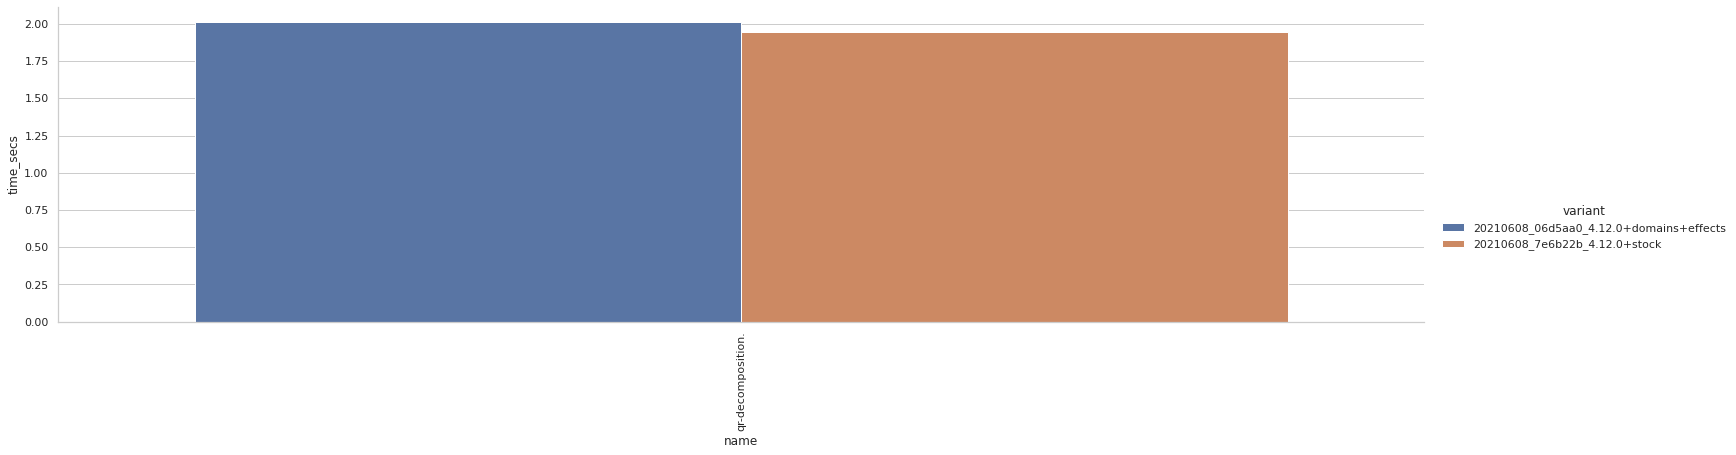

In [225]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalized

In [226]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
#     print(df['variant'])
    variant_metric_name = list([ zip(df[metric], df[x], df['name'])
            for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
#     print(df)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
#     print(df)
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
#         print(group)
        (v,data) = group
#         print(len(data[topic]))
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

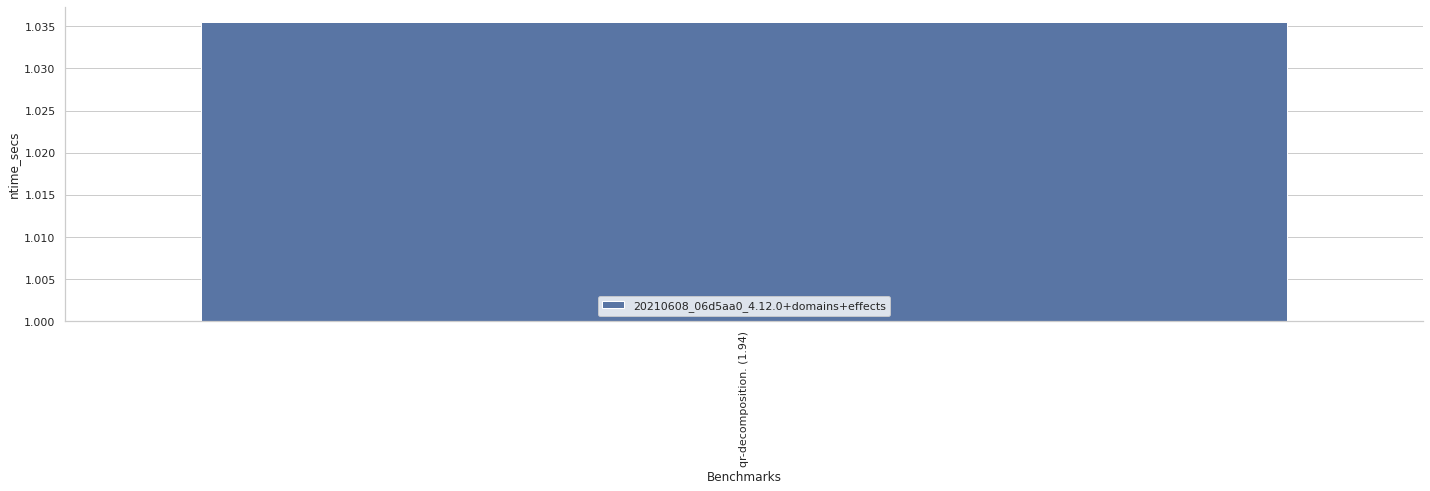

In [227]:
# print(df)
ndf = normalise(df, selected_baseline,'time_secs')
plot_normalised(ndf, selected_baseline,'ntime_secs')